<a href="https://colab.research.google.com/github/mwinzie/KNN-Classifier-Naive-Bayes-Classifier/blob/master/K_nearest_neighbor_(kNN)_classifier_and_Naive_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

# Spam Dataset

In [90]:
#loading the spam dataset
spam = pd.read_csv('spambasec.csv')
spam.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [91]:
#checking the dataset shape
spam.shape

#the dataset contains 4601 rows and 58 columns

(4601, 58)

In [0]:
#checking and creating uniformity among the column names
spam.columns = spam.columns.str.replace(':','')

In [0]:
#checking the unique values in the dataset
for i in spam.columns:
  print('\n')
  print('Column Name:', i)
  print(spam[i].unique())



Column Name: word_freq_make
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


Column Name: word_freq_address
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4

In [93]:
#checking for any null values in the spam dataset
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

> The dataset has no null values

In [94]:
#checking the dataset information
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [0]:
# Select duplicate rows except first occurrence based on all columns in the dataset
duplicaterows = spam[spam.duplicated(keep = 'last')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicaterows)


Duplicate Rows except first occurrence based on all columns are :
      word_freq_make  word_freq_address  ...  capital_run_length_total  class
24              0.00               0.00  ...                        82      1
101             0.00               0.00  ...                       292      1
102             0.00               0.00  ...                        66      1
103             0.00               0.00  ...                       292      1
104             0.00               0.00  ...                        66      1
106             0.00               0.00  ...                        66      1
116             0.05               0.30  ...                       588      1
117             0.05               0.30  ...                       583      1
122             0.50               0.46  ...                      2413      1
135             0.00               0.39  ...                       730      1
137             1.00               0.00  ...                       304      

The dataset has 391 rows of duplicate values. I shall leave them for now as the dataset is about frequency of words and characters and some may be a repetition of some words or characters. I shall work with the data as it is.

## Exploratory Data Analysis (Spam Dataset)

In [95]:
#Checking the measures of central tendencies and location for the dataset
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

> There is some variance in the attributes in the dataset. Shows some variables are more viable than others. I shall continue exploring the dataset by plotting some graphs to see which columns appear to have less information and probably drop some columns.

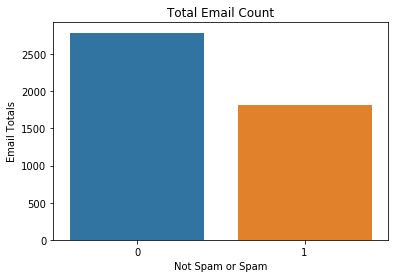

In [96]:
#plotting the spam and not spam variable, the class column
sns.countplot(spam['class'])
plt.xlabel('Not Spam or Spam')
plt.ylabel('Email Totals')
plt.title('Total Email Count')
plt.show()

In [0]:
#creating the spam dataset where class = 1
cols = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference']]


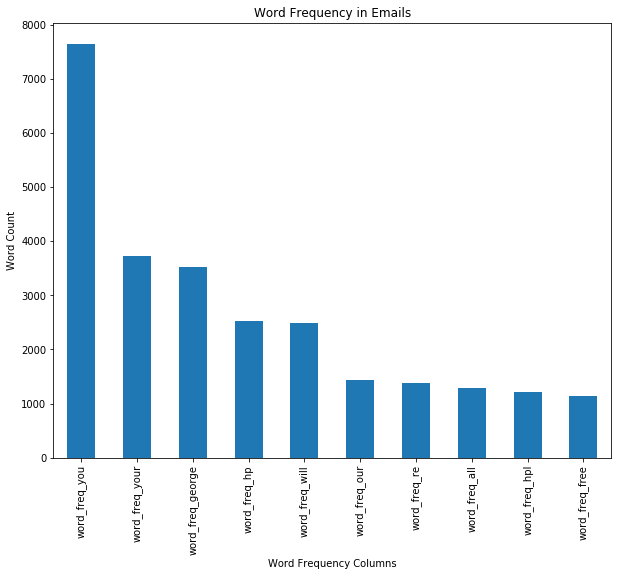

In [124]:
cols.sum().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (10,8))
plt.title('Word Frequency in Emails')
plt.xlabel('Word Frequency Columns')
plt.ylabel('Word Count')
plt.show()

The graph above shows the most frequent words(top 10) in the spam dataset.

The 'you' word is the most frequent word in the emails, followed by 'your'.

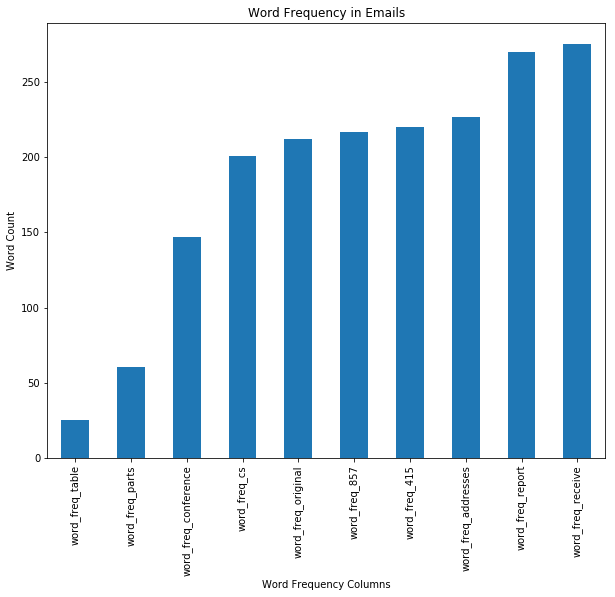

In [125]:
cols.sum().sort_values(ascending = True).head(10).plot(kind = 'bar', figsize = (10,8))
plt.title('Word Frequency in Emails')
plt.xlabel('Word Frequency Columns')
plt.ylabel('Word Count')
plt.show()

The graph above shows the least frequent word being 'table' followed by 'parts'.

In [128]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


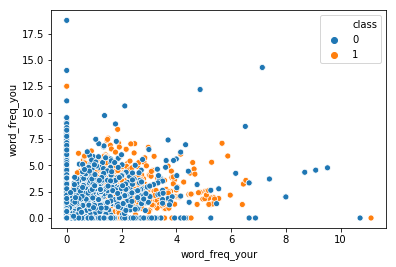

In [130]:
sns.scatterplot(x = 'word_freq_your', y = 'word_freq_you', hue = 'class', data = spam)

# Model Classification
For my model classification i shall use the Naive Bayes classifier to get accuracy scores of the model

###  Testing for Normality

In [0]:
#testing for normal distribution using the Shapiro Wilk Test
from scipy.stats import shapiro

In [11]:
# testing for normality
stat, p = shapiro(spam)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting the results
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.037, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The spam dataset appears not to be normally distributed. And with that conclusion I cannot use the Gaussian Naive Bayes Classifier as Gaussian assumes the distribution of features should be normally distributed.

In [0]:
plt.figure(figsize = (12,12))

sns.pairplot(spam, diag_kind='kde');

In [0]:
X = spam.drop('class', axis = 1)
y = spam['class']

In [87]:
# Training the Model
# build our model. 
# We will start by splitting our data into training and test sets
# 
from sklearn.model_selection import train_test_split
for i in [0.2,0.3,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i, random_state=0)
  # Fitting the model. 
# Initializing the Naive Bayes Classifier and fitting the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is best-suited
  model = MultinomialNB().fit(X_train, y_train)
  
#evaluating the model
  predicted = model.predict(X_test)
  print(i, accuracy_score(y_test, predicted))

0.2 0.8121606948968513
0.3 0.8095582910934106
0.4 0.8098859315589354


> The Multinomial Naive Bayes classifier gives an accuracy score of 81.2% when the data is split 80/20. 
> An accuracy score of 80.96% using the 70/30 split
> An accuracy score of 80.98% using the 60/40 split

# Titanic Dataset

In [0]:
#Uploading the train and test datasets
train = pd.read_csv('train.csv')

In [38]:
#observing the observations in the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#checking the shape of the train dataset
train.shape

(891, 12)

## Data Cleaning

In [0]:
# Function to calculate missing values by column in the dataset
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Your selected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [41]:
print(missing_values_table(train))

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
Cabin                687              77.10
Age                  177              19.87
Embarked               2               0.22


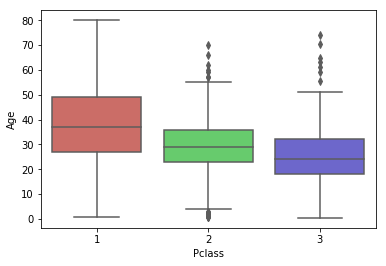

In [42]:
#boxplot for train set
sb.boxplot(x='Pclass', y='Age', data=train, palette='hls')

In [0]:
#A function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [44]:
# Appling the function and check again for null values in the train set.
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age variable in the train sets has 0 null values.

In [0]:
#dealing with missing values in the train dataset
#dropping the null values in the embarked column
train.dropna(subset = ['Embarked'],axis = 0, inplace = True)

In [0]:
#dealing with the cabin variable missing values
#the cabin variable looks like it has a lot of missing date.
#It has 78.23% missing in the test dataset and 77.10% in the train dataset
train.drop('Cabin' ,axis = 1, inplace = True)

In [48]:
train.shape

(889, 11)

In [0]:
#confirming that all columns have no more missing values

In [49]:
train.isnull().sum().sum()

0

In [0]:
#printing unique values in the test dataset
for i in train.columns:
  print('Columns:', i)
  print('\n')
  print(train[i].unique())


Columns: PassengerId


[  2   4   7  11  12  22  24  28  32  53  55  56  63  67  76  89  93  97
  98 103 111 119 124 125 129 137 138 140 149 152 167 171 175 178 184 186
 194 195 196 206 210 216 219 225 231 246 249 252 253 258 263 264 269 270
 274 276 285 292 293 298 299 300 304 306 308 310 311 312 319 320 326 328
 330 332 333 337 338 340 341 342 346 352 357 367 370 371 378 391 394 395
 413 430 431 435 436 439 446 450 453 454 457 458 461 463 474 476 485 487
 488 493 497 499 505 506 513 516 517 521 524 528 537 540 541 545 551 557
 559 572 573 578 582 584 586 588 592 600 610 619 622 626 628 631 633 642
 646 648 660 663 670 672 680 682 690 691 699 700 701 702 708 711 712 713
 716 717 718 725 731 738 741 742 743 746 749 752 760 764 766 773 777 780
 782 783 790 797 803 807 810 816 821 824 836 840 850 854 858 863 868 872
 873 880 888 890]
Columns: Survived


[1 0]
Columns: Pclass


[1 3 2]
Columns: Name


['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (L

In [50]:
#checking the data types in the train dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

The data types are all in numerical format so there is no need to convert the data types

In [0]:
# After looking at the unique columns, some columns will not be relevant in these datasets, i.e the persons
#name, ticket number, and passenger ID number for predicting survivability. 
# 
train = train.drop(['PassengerId','Name','Ticket'], axis = 1)

In [56]:
#checking what is left in the train dataset
print(train.shape)

(889, 8)


In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
#mapping the female and embarked column to intergers, i.e 0 and 1

train['Sex']= train['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [0]:
train['Embarked']= train['Embarked'].map({'S': 0, 'C':1, 'Q': 2}).astype(int)

In [0]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# Model Classification
I shall implement Multinomial, LOgistic Regression and KNN classifiers

In [0]:
#creating the feature and target columns
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [61]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

#creating a list that includes the three models I shall use: 
#KNeighbours, Logistic Regression and Multinomial
model_list = [KNeighborsClassifier(), LogisticRegression(), MultinomialNB()]
model_names = ['neighbors', 'logistic', 'multinomial']

for model, name in zip(model_list, model_names):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

  sc = MinMaxScaler()
  X_train= sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  model = model
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(f'{name} accuracy is: {accuracy_score(y_test, y_pred)} and f1 score is {f1_score(y_test, y_pred)}')


neighbors accuracy is: 0.7533632286995515 and f1 score is 0.6783625730994152
logistic accuracy is: 0.7668161434977578 and f1 score is 0.6941176470588236
multinomial accuracy is: 0.6681614349775785 and f1 score is 0.3934426229508197


From the models used, Logostic Regression is the best model giving an accuracy score of 76% and an f1 score of 69%.
KNeighbours classifier performed equally good giving an accuracy score of 76.7% and an f1 score of 69.4%.
Multinomial is the worst performing model